In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("../data/interim/train.csv")
test = pd.read_csv("../data/interim/test.csv")
train.head()

,peserta.STD(fkrtl.lama_hari_kunjungan),peserta.SUM(fkrtl.jml_kunjungan_fkrtl),jml_kunjungan_fkrtl,status_pulang_peserta,MONTH(tanggal_pulang),YEAR(tanggal_pulang),peserta.SUM(fkrtl.lama_hari_kunjungan),peserta.status_peserta,peserta.SUM(fktp.jarak_hari_antar_kunjungan),MONTH(tanggal_datang),...,peserta.MAX(fktp.jarak_hari_antar_kunjungan),peserta.SUM(fkrtl.no_keluarga),peserta.MIN(fkrtl.spesifikasi_kelompok_kasus),peserta.SUM(fkrtl.bobot),peserta.STD(fkrtl.biaya_tagih),peserta.SUM(fktp.bobot),peserta.MIN(fkrtl.biaya_tagih),peserta.gender,peserta.COUNT(fktp),readmitted_30d
0,0.227699,-0.094196,0.864951,0,4,2020,0.268705,2,-1.721583,4,...,0.000000,-0.356290,-0.504986,0.542504,-0.589181,-0.762970,-1.170089,1,-0.876887,0
1,-0.298560,-0.225341,-0.489105,3,0,2020,-0.192478,2,-1.721583,0,...,0.000000,-0.346450,-0.823839,-0.005455,-0.906346,-0.671221,-0.605438,1,-0.784533,1
2,0.020066,-0.094196,0.187923,3,7,2020,0.360941,1,0.433170,7,...,-0.478321,-0.172754,-0.823839,0.495776,-0.355748,1.089862,-0.454042,0,0.970200,0
3,-0.422445,1.086116,2.896035,3,11,2020,1.652253,1,0.860893,11,...,-0.001438,-0.091115,-0.504986,2.748588,-0.092010,0.541366,-1.153514,1,0.323719,1
4,-0.313880,4.823769,3.573063,3,3,2020,1.560016,2,-1.140526,3,...,-0.250247,0.746741,-0.823839,4.267781,-0.224923,-0.610887,-0.894251,1,-0.692178,1


In [3]:
X_train = train.drop(columns=['readmitted_30d'])
y_train = train[['readmitted_30d']]
X_test = test.drop(columns=['readmitted_30d'])
y_test = test[['readmitted_30d']]

In [4]:
def show_cm(y_test, y_pred, model_name):
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format="d")
    disp.figure_.suptitle(f"Confusion Matrix {model_name}")
    plt.show()

# Logistic Regression

In [5]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test, y_pred_logreg))

c:\Users\frend\Projects\Classification\hospital_readmission_prediction\venv\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.89      0.97      0.92      4716
           1       0.62      0.31      0.41       850

    accuracy                           0.87      5566
   macro avg       0.75      0.64      0.67      5566
weighted avg       0.85      0.87      0.85      5566



c:\Users\frend\Projects\Classification\hospital_readmission_prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
probs_logreg = logreg.predict_proba(X_test)[:, 1]
print("ROC AUC Score:",roc_auc_score(y_test, probs_logreg))

ROC AUC Score: 0.870982387866088


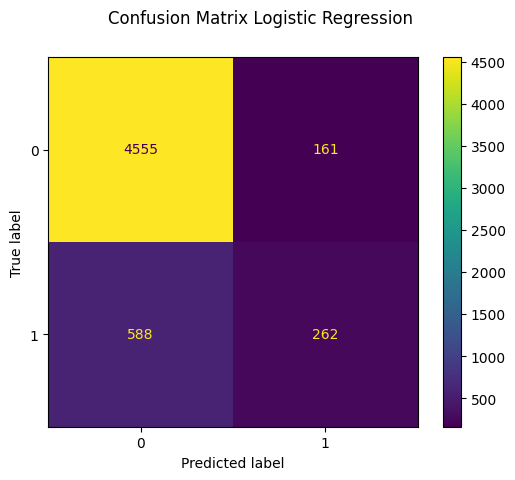

In [7]:
show_cm(y_test, y_pred_logreg, "Logistic Regression")

# Random Forest

In [8]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

c:\Users\frend\Projects\Classification\hospital_readmission_prediction\venv\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.90      0.95      0.93      4716
           1       0.62      0.43      0.51       850

    accuracy                           0.87      5566
   macro avg       0.76      0.69      0.72      5566
weighted avg       0.86      0.87      0.86      5566



In [9]:
probs_rf = rf.predict_proba(X_test)[:, 1]
print("ROC AUC Score:",roc_auc_score(y_test, probs_rf))

ROC AUC Score: 0.9123576809858804


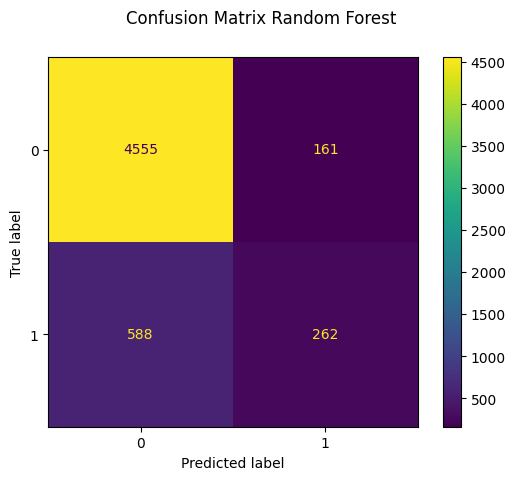

In [10]:
show_cm(y_test, y_pred_logreg, "Random Forest")

# K-Nearest Neighbors

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

c:\Users\frend\Projects\Classification\hospital_readmission_prediction\venv\Lib\site-packages\sklearn\neighbors\_classification.py:243: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4716
           1       0.38      0.12      0.18       850

    accuracy                           0.84      5566
   macro avg       0.62      0.54      0.55      5566
weighted avg       0.78      0.84      0.80      5566



In [12]:
probs_knn = knn.predict_proba(X_test)[:, 1]
print("ROC AUC Score:",roc_auc_score(y_test, probs_knn))

ROC AUC Score: 0.5974925160904057


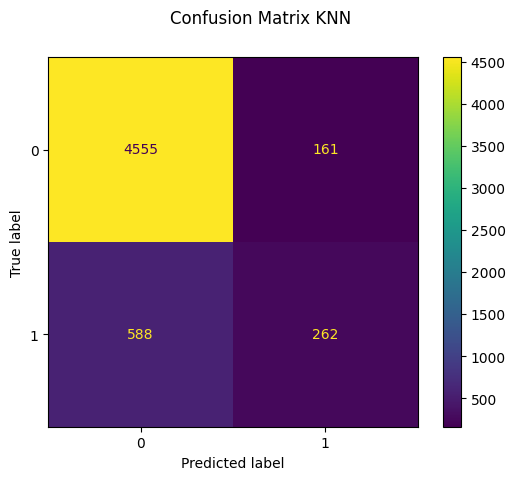

In [13]:
show_cm(y_test, y_pred_logreg, "KNN")

# XGBoost

In [14]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4716
           1       0.65      0.62      0.63       850

    accuracy                           0.89      5566
   macro avg       0.79      0.78      0.78      5566
weighted avg       0.89      0.89      0.89      5566



In [15]:
probs_xgb = xgb.predict_proba(X_test)[:, 1]
print("ROC AUC Score:",roc_auc_score(y_test, probs_xgb))

ROC AUC Score: 0.9369263583295914


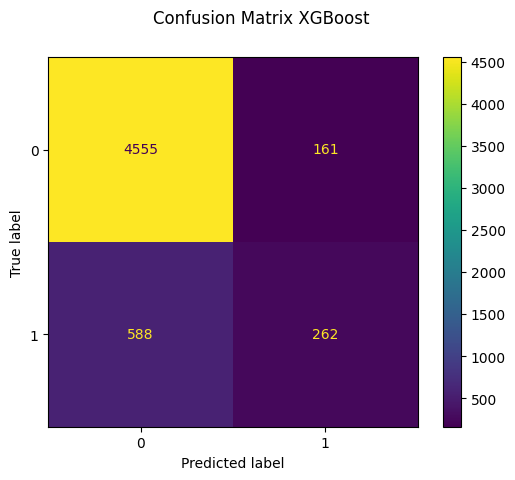

In [16]:
show_cm(y_test, y_pred_logreg, "XGBoost")